In [1]:
import scib

import scanpy as sc
import pandas as pd
import numpy as np

During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


In [2]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

/home/icb/soroor.hediyeh-zadeh/miniconda3/envs/scib-scvi/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [3]:
def compute_scib_metrics(adata, emb_key, label_key, batch_key, model_name):
    from scib.metrics.silhouette import silhouette_batch, silhouette
    from scib.metrics.lisi import lisi_graph
    import pandas as pd

    emb_key_ = "X_emb"
    adata.obsm[emb_key_] = adata.obsm[emb_key]
    sc.pp.neighbors(adata, use_rep=emb_key_)
    df = pd.DataFrame(index=[model_name])
#     df["clisi"] = scib.metrics.clisi_graph(adata, batch_key, label_key, type_="embed")
    
    
    df["graph_connectivity"] = scib.metrics.graph_connectivity(adata, label_key)
    df["sil_batch"] = silhouette_batch(adata, batch_key, label_key, emb_key_)
    df["sil_labels"] = silhouette(adata, label_key, emb_key_)
    df["celltype_F1"] = scib.metrics.isolated_labels(adata, label_key, batch_key, cluster=False, embed = emb_key)

    return df

In [4]:
adata_full = sc.read('../results/pancreas_finetune_latent.h5ad')

emb_key = "X_scVI"
scvi_metrics1 = compute_scib_metrics(adata_full, emb_key, "celltype", "tech_orig", "fine-tune")
scvi_metrics1

mean silhouette per group:                     silhouette_score
group                               
acinar                      0.845614
activated_stellate          0.873461
alpha                       0.899104
beta                        0.908715
delta                       0.910465
ductal                      0.899412
endothelial                 0.865536
epsilon                     0.729303
gamma                       0.874028
macrophage                  0.856590
mast                        0.808183
quiescent_stellate          0.854925
schwann                     0.802127
t_cell                      0.813318
isolated labels: no more than 4 batches per label
t_cell: 0.6036002561450005


,graph_connectivity,sil_batch,sil_labels,celltype_F1
fine-tune,0.984103,0.852913,0.585793,0.6036


In [5]:
adata_full = sc.read('../results/pancreas_surgery_latent.h5ad')

emb_key = "X_scVI"
scvi_metrics2 = compute_scib_metrics(adata_full, emb_key, "celltype", "tech_orig", "surgery")
scvi_metrics2

mean silhouette per group:                     silhouette_score
group                               
acinar                      0.892470
activated_stellate          0.880504
alpha                       0.892839
beta                        0.924711
delta                       0.928506
ductal                      0.905457
endothelial                 0.833802
epsilon                     0.784332
gamma                       0.913429
macrophage                  0.869621
mast                        0.804784
quiescent_stellate          0.880585
schwann                     0.855231
t_cell                      0.821524
isolated labels: no more than 4 batches per label
t_cell: 0.6043961942195892


,graph_connectivity,sil_batch,sil_labels,celltype_F1
surgery,0.986043,0.870557,0.610954,0.604396


In [6]:
adata_full = sc.read('../results/pancreas_clcvae_latent.h5ad')

emb_key = "X_scVI"
scvi_metrics3 = compute_scib_metrics(adata_full, emb_key, "celltype", "tech_orig", "clcvae")
scvi_metrics3

mean silhouette per group:                     silhouette_score
group                               
acinar                      0.891051
activated_stellate          0.888215
alpha                       0.885715
beta                        0.918450
delta                       0.935987
ductal                      0.905090
endothelial                 0.835935
epsilon                     0.784838
gamma                       0.918643
macrophage                  0.865078
mast                        0.825611
quiescent_stellate          0.881199
schwann                     0.838061
t_cell                      0.801594
isolated labels: no more than 4 batches per label
t_cell: 0.6173735857009888


,graph_connectivity,sil_batch,sil_labels,celltype_F1
clcvae,0.984659,0.869676,0.618086,0.617374


In [10]:
df = pd.concat((scvi_metrics1, scvi_metrics2, scvi_metrics3))

In [12]:
df = df.T

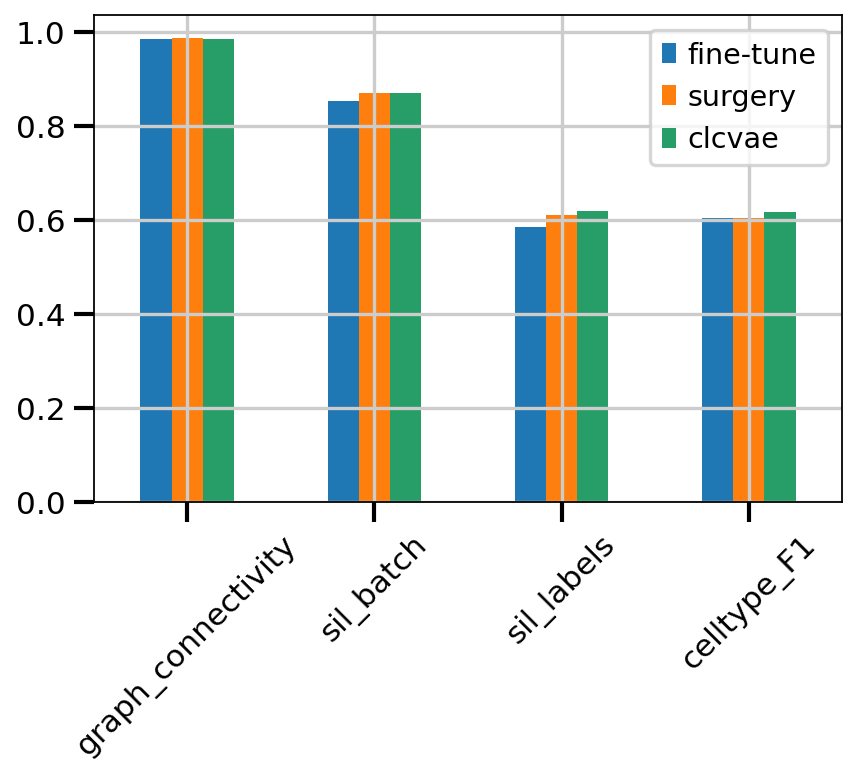

In [36]:
ax = df.plot.bar(rot=45, figsize=(6, 4))

In [37]:
ax.figure.savefig('figures/pancreas_scib_metrics.png')